# IBM Employee Attrition Prediction

## Description

IBM is an American MNC operating in around 170 countries with major business vertical as computing, software, and hardware.
Attrition is a major risk to service-providing organizations where trained and experienced people are the assets of the company. The organization would like to identify the factors which influence the attrition of employees.

## Data Dictionary

* Age: Age of employee
* Attrition: Employee attrition status
* Department: Department of work
* DistanceFromHome
* Education: 1-Below College; 2- College; 3-Bachelor; 4-Master; 5-Doctor;
* EducationField
* EnvironmentSatisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;
* JobSatisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;
* MaritalStatus
* MonthlyIncome
* NumCompaniesWorked: Number of companies worked prior to IBM
* WorkLifeBalance: 1-Bad; 2-Good; 3-Better; 4-Best;
* YearsAtCompany: Current years of service in IBM


# Import Libraries

In [10]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from patsy import dmatrices
import sklearn
import seaborn as sns

# Import attrition dataset 

In [3]:
dataframe=pd.read_csv("C:/Users/Anushree/Downloads/1576148666_ibmattritiondata/IBM Attrition Data.csv")

# Exploratory data analysis

In [4]:
dataframe.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [4]:
names = dataframe.columns.values 
print(names)

['Age' 'Attrition' 'Department' 'DistanceFromHome' 'Education'
 'EducationField' 'EnvironmentSatisfaction' 'JobSatisfaction'
 'MaritalStatus' 'MonthlyIncome' 'NumCompaniesWorked' 'WorkLifeBalance'
 'YearsAtCompany']


# Age distribution of Employees

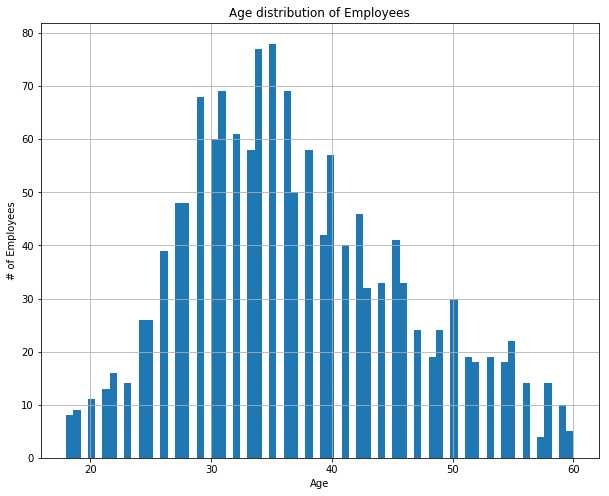

In [9]:
# histogram for age
plt.figure(figsize=(10,8))
dataframe['Age'].hist(bins=70)
plt.title("Age distribution of Employees")
plt.xlabel("Age")
plt.ylabel("# of Employees")
plt.show()

# Attrition of Employees by Age

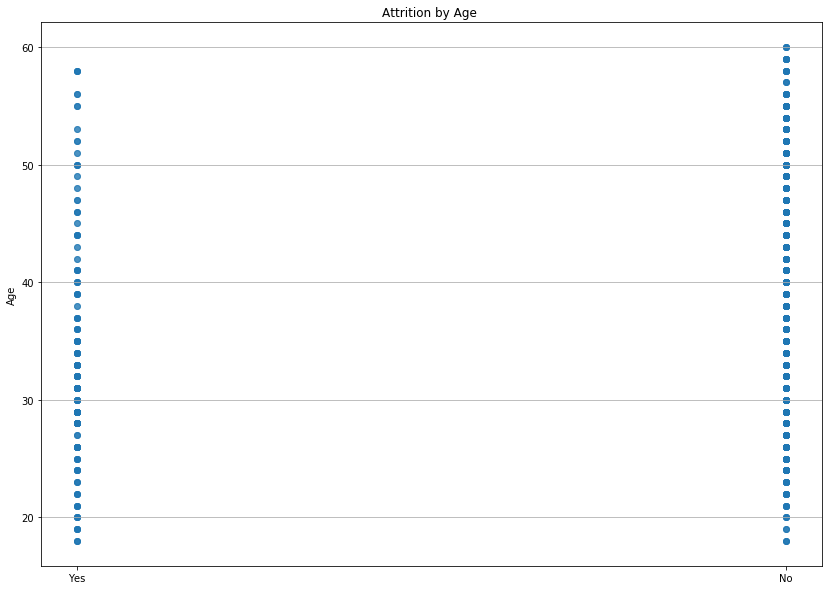

In [6]:
# explore data for Attrition by Age
plt.figure(figsize=(14,10))
plt.scatter(dataframe.Attrition,dataframe.Age, alpha=.55)
plt.title("Attrition by Age ")
plt.ylabel("Age")
plt.grid(b=True, which='major',axis='y')
plt.show()

# Analysis of Left Employees

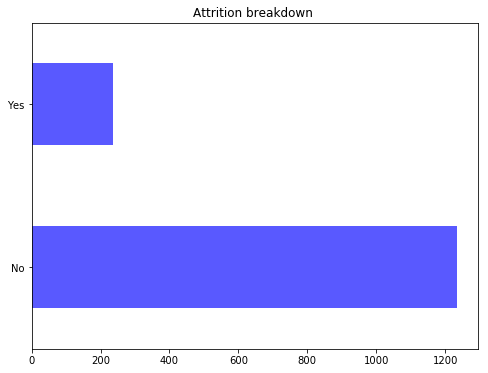

In [7]:
# explore data for Left employees breakdown
plt.figure(figsize=(8,6))
dataframe.Attrition.value_counts().plot(kind='barh',color='blue',alpha=.65)
plt.title("Attrition breakdown ")
plt.show()

# Distribution of employees by the education field

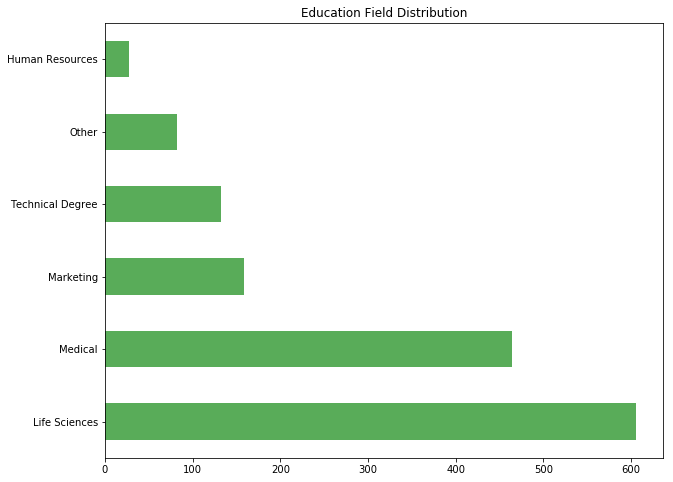

In [8]:
# explore data for Education Field distribution
plt.figure(figsize=(10,8))
dataframe.EducationField.value_counts().plot(kind='barh',color='g',alpha=.65)
plt.title("Education Field Distribution")
plt.show()

# Marital Status of Employees

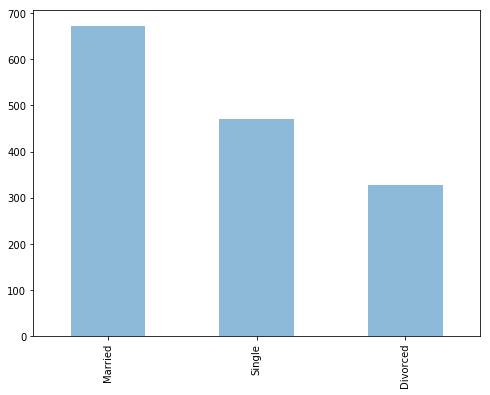

In [9]:
# explore data for Marital Status
plt.figure(figsize=(8,6))
dataframe.MaritalStatus.value_counts().plot(kind='bar',alpha=.5)
plt.show()

# Statistical analysis of data

In [10]:
dataframe.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [11]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
Age                        1470 non-null int64
Attrition                  1470 non-null object
Department                 1470 non-null object
DistanceFromHome           1470 non-null int64
Education                  1470 non-null int64
EducationField             1470 non-null object
EnvironmentSatisfaction    1470 non-null int64
JobSatisfaction            1470 non-null int64
MaritalStatus              1470 non-null object
MonthlyIncome              1470 non-null int64
NumCompaniesWorked         1470 non-null int64
WorkLifeBalance            1470 non-null int64
YearsAtCompany             1470 non-null int64
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [11]:
dataframe.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [13]:
dataframe.std()

Age                           9.135373
DistanceFromHome              8.106864
Education                     1.024165
EnvironmentSatisfaction       1.093082
JobSatisfaction               1.102846
MonthlyIncome              4707.956783
NumCompaniesWorked            2.498009
WorkLifeBalance               0.706476
YearsAtCompany                6.126525
dtype: float64

In [12]:
dataframe['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [15]:
dataframe['Attrition'].dtypes

dtype('O')

# Encoding of Categorical data 

In [13]:
dataframe['Attrition'].replace('Yes',1, inplace=True)
dataframe['Attrition'].replace('No',0, inplace=True)

In [14]:
dataframe.head(10)

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,0,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,1,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,0,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,0,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
5,32,0,Research & Development,2,2,Life Sciences,4,4,Single,3068,0,2,7
6,59,0,Research & Development,3,3,Medical,3,1,Married,2670,4,2,1
7,30,0,Research & Development,24,1,Life Sciences,4,3,Divorced,2693,1,3,1
8,38,0,Research & Development,23,3,Life Sciences,4,3,Single,9526,0,3,9
9,36,0,Research & Development,27,3,Medical,3,3,Married,5237,6,2,7


# Data Preprocessing

In [15]:
# building up a logistic regression model
X = dataframe.drop(['Attrition'],axis=1)
X.head()
Y = dataframe['Attrition']
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [17]:
dataframe['EducationField'].replace('Life Sciences',1, inplace=True)
dataframe['EducationField'].replace('Medical',2, inplace=True)
dataframe['EducationField'].replace('Marketing', 3, inplace=True)
dataframe['EducationField'].replace('Other',4, inplace=True)
dataframe['EducationField'].replace('Technical Degree',5, inplace=True)
dataframe['EducationField'].replace('Human Resources', 6, inplace=True)

In [18]:
dataframe['EducationField'].value_counts()

1    606
2    464
3    159
5    132
4     82
6     27
Name: EducationField, dtype: int64

In [19]:
dataframe['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [20]:
dataframe['Department'].replace('Research & Development',1, inplace=True)
dataframe['Department'].replace('Sales',2, inplace=True)
dataframe['Department'].replace('Human Resources', 3, inplace=True)

In [21]:
dataframe['Department'].value_counts()

1    961
2    446
3     63
Name: Department, dtype: int64

In [22]:
dataframe['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [23]:
dataframe['MaritalStatus'].replace('Married',1, inplace=True)
dataframe['MaritalStatus'].replace('Single',2, inplace=True)
dataframe['MaritalStatus'].replace('Divorced',3, inplace=True)

In [24]:
dataframe['MaritalStatus'].value_counts()

1    673
2    470
3    327
Name: MaritalStatus, dtype: int64

In [25]:
x=dataframe.select_dtypes(include=['int64'])
x.dtypes

Age                        int64
Attrition                  int64
Department                 int64
DistanceFromHome           int64
Education                  int64
EducationField             int64
EnvironmentSatisfaction    int64
JobSatisfaction            int64
MaritalStatus              int64
MonthlyIncome              int64
NumCompaniesWorked         int64
WorkLifeBalance            int64
YearsAtCompany             int64
dtype: object

In [26]:
x.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [27]:
y=dataframe['Attrition']

In [28]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [29]:
y, x = dmatrices('Attrition ~ Age + Department + \
                  DistanceFromHome + Education + EducationField + YearsAtCompany',
                  dataframe, return_type="dataframe")
print (x.columns)

Index(['Intercept', 'Age', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'YearsAtCompany'],
      dtype='object')


In [30]:
y = np.ravel(y)


# Model Building

In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model = model.fit(x, y)

# check the accuracy on the training set
model.score(x, y)

C:\Users\Anushree\Anaconda3\envs\tf_training\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8408163265306122

In [33]:
y.mean()

0.16122448979591836

In [34]:
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y, test_size=0.3, random_state=0)
model2=LogisticRegression()
model2.fit(X_train, y_train)

C:\Users\Anushree\Anaconda3\envs\tf_training\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Prediction on test data

In [35]:
predicted= model2.predict(X_test)
print (predicted)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.

In [36]:
probs = model2.predict_proba(X_test)
print (probs)

[[0.86257761 0.13742239]
 [0.80710189 0.19289811]
 [0.7429987  0.2570013 ]
 [0.83583504 0.16416496]
 [0.73307035 0.26692965]
 [0.78942615 0.21057385]
 [0.85718191 0.14281809]
 [0.85697723 0.14302277]
 [0.96732187 0.03267813]
 [0.93781765 0.06218235]
 [0.95112889 0.04887111]
 [0.83140356 0.16859644]
 [0.86069144 0.13930856]
 [0.863881   0.136119  ]
 [0.88818146 0.11181854]
 [0.88851235 0.11148765]
 [0.88418532 0.11581468]
 [0.78102191 0.21897809]
 [0.79870103 0.20129897]
 [0.88654952 0.11345048]
 [0.70201258 0.29798742]
 [0.94684452 0.05315548]
 [0.86687518 0.13312482]
 [0.84389943 0.15610057]
 [0.60328043 0.39671957]
 [0.8112161  0.1887839 ]
 [0.91914771 0.08085229]
 [0.93333047 0.06666953]
 [0.67850927 0.32149073]
 [0.87080099 0.12919901]
 [0.87277322 0.12722678]
 [0.77054173 0.22945827]
 [0.86434352 0.13565648]
 [0.95829505 0.04170495]
 [0.84589968 0.15410032]
 [0.86642435 0.13357565]
 [0.90489195 0.09510805]
 [0.68640634 0.31359366]
 [0.90762923 0.09237077]
 [0.80686978 0.19313022]


# Model Evaluation

In [40]:
from sklearn import metrics

print ("Accuracy=",metrics.accuracy_score(y_test, predicted))
print ("ROC=",metrics.roc_auc_score(y_test, probs[:, 1]))

Accuracy= 0.8435374149659864
ROC= 0.6500577589526376


In [41]:
print("Confusion Matrix")
print (metrics.confusion_matrix(y_test, predicted))
print("Classification Report")
print (metrics.classification_report(y_test, predicted))

Confusion Matrix
[[371   0]
 [ 69   1]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       371
         1.0       1.00      0.01      0.03        70

   micro avg       0.84      0.84      0.84       441
   macro avg       0.92      0.51      0.47       441
weighted avg       0.87      0.84      0.77       441



In [42]:
print (X_train)

      Intercept   Age  Department  DistanceFromHome  Education  \
338         1.0  30.0         2.0               5.0        3.0   
363         1.0  33.0         2.0               5.0        3.0   
759         1.0  45.0         3.0              24.0        4.0   
793         1.0  28.0         1.0              15.0        2.0   
581         1.0  30.0         1.0               1.0        3.0   
320         1.0  27.0         2.0               2.0        3.0   
452         1.0  45.0         2.0               2.0        3.0   
195         1.0  37.0         1.0              21.0        3.0   
776         1.0  20.0         2.0               9.0        3.0   
1295        1.0  41.0         2.0               4.0        1.0   
70          1.0  59.0         2.0               1.0        1.0   
1135        1.0  46.0         2.0               1.0        4.0   
1011        1.0  36.0         2.0               3.0        4.0   
10          1.0  35.0         1.0              16.0        3.0   
1265      

In [43]:
#add random values to KK according to the parameters mentioned above to check the proabily of attrition of the employee
kk=[[1.0, 23.0, 1.0, 500.0, 3.0, 24.0, 1.0]]
print(model.predict_proba(kk))

[[7.14144701e-07 9.99999286e-01]]


# Conclusion

We have created a Logistic Regression model for the prediction of Employees Attrition.
Our model can predict the Attrition of the employee with the accuracy of 84%. 
We should perform feature engineering on the data and try other classification models such as 
Random Forest,SVM,KNN and DT to acheive better accuracy.